### Importing keras libraries

In [14]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Importing other libraries we're gonna use :)

In [2]:
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd
import numpy as np
import warnings
import os

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [3]:
od.download("https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/")

Skipping, found downloaded files in ".\emotion-detection-fer" (use force=True to force download)


### Checking dir addresses and creating df's

In [4]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'background.jpg',
 'Dieguis_GUI.py',
 'Dieguis_GUI.rar',
 'emotion-detection-fer',
 'emotionsdetectormodel.h5',
 'emotionsdetectormodel.json',
 'fer2013_mini_XCEPTION.102-0.66.hdf5',
 'Images',
 'Prueba técnica - Arkangel Ai.ipynb',
 'Real_time_detection.py',
 'Second attempt.ipynb',
 'Third_attempt.ipynb',
 'UI.py']

In [5]:
os.listdir('emotion-detection-fer')

['test', 'train']

In [6]:
train_dir = "emotion-detection-fer/train"
test_dir = "emotion-detection-fer/test"

In [7]:
def CreateDF(_dir):
    image_paths = []
    labels = []
    
    for label in os.listdir(_dir):
        for image_name in os.listdir(os.path.join(_dir,label)):
            image_paths.append(os.path.join(_dir,label,image_name))
            labels.append(label)
            
        print(label, "Completed")
    return image_paths,labels

In [8]:
print('Creating train dataframe . . .')
train = pd.DataFrame()
train['image'], train['label'] = CreateDF(train_dir)
print('\n Creating test dataframe . . .')
test = pd.DataFrame()
test['image'], test['label'] = CreateDF(test_dir)

Creating train dataframe . . .
angry Completed
disgusted Completed
fearful Completed
happy Completed
neutral Completed
sad Completed
surprised Completed

 Creating test dataframe . . .
angry Completed
disgusted Completed
fearful Completed
happy Completed
neutral Completed
sad Completed
surprised Completed


In [9]:
print(train)
print('\n')
print(test)

                                                 image      label
0            emotion-detection-fer/train\angry\im0.png      angry
1            emotion-detection-fer/train\angry\im1.png      angry
2           emotion-detection-fer/train\angry\im10.png      angry
3          emotion-detection-fer/train\angry\im100.png      angry
4         emotion-detection-fer/train\angry\im1000.png      angry
...                                                ...        ...
28704  emotion-detection-fer/train\surprised\im995.png  surprised
28705  emotion-detection-fer/train\surprised\im996.png  surprised
28706  emotion-detection-fer/train\surprised\im997.png  surprised
28707  emotion-detection-fer/train\surprised\im998.png  surprised
28708  emotion-detection-fer/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


                                              image      label
0          emotion-detection-fer/test\angry\im0.png      angry
1          emotion-detection-fer/test\angry\im1.png   

### Extracting features

In [10]:
def ext_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = np.array(img)
        features.append(img)
    features =  np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    
    return features

In [15]:
train_features = ext_features(train['image'])
test_features = ext_features(test['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7178 [00:00<?, ?it/s]

In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

### Labeling the data

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [21]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

### Model

In [26]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation='relu', input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layers

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))

#output layer

model.add(Dense(7, activation = 'softmax'))

In [29]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [30]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
225/225 [==============================] - 382s 2s/step - loss: 1.8254 - accuracy: 0.2474 - val_loss: 1.8135 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 385s 2s/step - loss: 1.8106 - accuracy: 0.2506 - val_loss: 1.8019 - val_accuracy: 0.2471
Epoch 3/100
225/225 [==============================] - 373s 2s/step - loss: 1.7493 - accuracy: 0.2782 - val_loss: 1.6815 - val_accuracy: 0.3110
Epoch 4/100
225/225 [==============================] - 371s 2s/step - loss: 1.6299 - accuracy: 0.3538 - val_loss: 1.4776 - val_accuracy: 0.4255
Epoch 5/100
225/225 [==============================] - 372s 2s/step - loss: 1.5332 - accuracy: 0.4004 - val_loss: 1.4533 - val_accuracy: 0.4280
Epoch 6/100
225/225 [==============================] - 367s 2s/step - loss: 1.4636 - accuracy: 0.4321 - val_loss: 1.3355 - val_accuracy: 0.4855
Epoch 7/100
225/225 [==============================] - 364s 2s/step - loss: 1.4174 - accuracy: 0.4538 - val_loss: 1.2912 - val_accuracy:

### Saving and loading model 

In [31]:
model_json = model.to_json()
with open("emotionsdetectormodel.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotionsdetectormodel.h5")

In [19]:
from keras.models import model_from_json
json_file = open("emotionsdetectormodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotionsdetectormodel.h5")

In [20]:
label = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

### Testing model

In [21]:
def ef(image):
    img = load_img(image, grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


The image is happy
1/1 [==============================] - 0s 472ms/step
Model prediction is happy


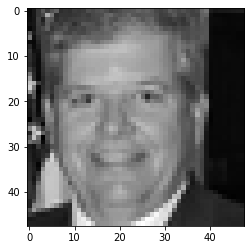

In [22]:
image = "emotion-detection-fer/test/happy/im8.png"
print("The image is happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gry')

The image is disgusted
1/1 [==============================] - 0s 55ms/step
Model prediction is disgusted


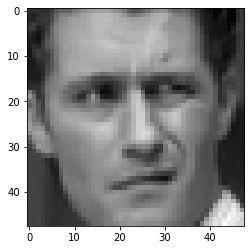

In [23]:
image = "emotion-detection-fer/test/disgusted/im17.png"
print("The image is disgusted")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gray')

He seems happy
1/1 [==============================] - 0s 44ms/step
Model prediction is happy


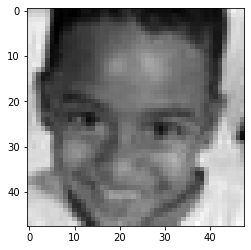

In [25]:
image = "C:/Users/diego/Desktop/choco_mod.png"
print("He seems happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap = 'gray')